# MAT330 - 3. Try a linear model

<span style="color:blue"> ** This notebook train a linear model on all the input features with no feature processing.
This a basic baseline. Use this notebook to explore the steps of training a model** </span>



In [10]:
# Load the useful python modules
%matplotlib inline
import os
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd

## Load data

In [11]:
train_filename = 'https://raw.githubusercontent.com/brajard/MAT330-Practical-work/master/data/train.csv'
train_filename = './data/train.csv'
data_train = pd.read_csv(train_filename)

# Extract the predictor (but not the target -> data leakage)
X = data_train.drop('target',axis=1, inplace=False)
y = data_train['target']

# Do the same with the test dataset
test_filename = 'https://raw.githubusercontent.com/brajard/MAT330-Practical-work/master/data/test.csv'
test_filename = './data/test.csv'
Xtest = pd.read_csv(test_filename)


## Train a model

### 1. Feature selection

In [12]:
from sklearn.preprocessing import StandardScaler

#Use all the features with no preprocessing expect drop stormid which is not numerical
Xin = X.drop('stormid', axis=1)
Xin_test = Xtest.drop('stormid', axis=1)

# Equalization of the types:
Xin = Xin.astype(float)
Xin_test = Xin_test.astype(float)




### 2. Train into Val/Train

In [13]:
from sklearn.utils import shuffle
np.random.seed(10)

#Selects the different stormid to split into train/validation
ids = shuffle(X.stormid.unique())

#Take 80% for training
limit_train = int(.8*len(ids))

#Index of training/val
idx_train = X.index[X.stormid.isin(ids[:limit_train])]
idx_val = X.index[X.stormid.isin(ids[limit_train:])]

#Split the dataset into train/validation
X_train, y_train = Xin.loc[idx_train], y.loc[idx_train]
X_val, y_val = Xin.loc[idx_val], y.loc[idx_val]

### 3. No Standardization


In [20]:
# The input features are used with no transformation for learning
X_train_scaled = X_train
X_val_scaled = X_val
X_test_scaled = Xin_test

### 4. Training

In [21]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 5. Validate the model

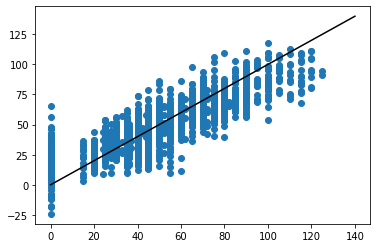

In [22]:
y_val_predict = reg.predict(X_val_scaled)
plt.scatter(y_val,y_val_predict)
plt.plot([0,140],[0,140],'-k')
plt.show()

In [23]:
score = reg.score(X_val_scaled,y_val)
print('linear regression score: {:.3f}'.format(score))

linear regression score: 0.745


### 6. Predicting the test dataset

In [25]:
#Change the name for the file (e.g. you last name + a name for you algo)
name = 'naive_lin'

y_test_predict = reg.predict(X_test_scaled)
np.save('test_predict.' + name + '.npy',y_test_predict)

#Send the file by email to julien.brajard@nersc.no to check the score